# RQ1 - Influence of the programming style on the performance of the participants

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from modules import stats as util_stats
import os
plt.rcParams['savefig.facecolor'] = 'white'

In [2]:
df = pd.read_csv('./data/preprocessed_experiment_data.csv')
df = df[df["Outlier"] == False]

In [3]:
# create folder if it does not exists
if not os.path.exists("./results/RQ1"):
    os.makedirs("./results/RQ1/data")
    os.makedirs("./results/RQ1/figures")

## Descriptive Statistics

### Correctness Ratio

In [4]:
df_iterative = pd.DataFrame([], columns=["ProgrammingStyle", "Algorithm", "NumberOfCorrect", "NumberOfTotal"])
df_recursive = pd.DataFrame([], columns=["ProgrammingStyle", "Algorithm", "NumberOfCorrect", "NumberOfTotal"])
df_higher_order = pd.DataFrame([], columns=["ProgrammingStyle", "Algorithm", "NumberOfCorrect", "NumberOfTotal"])
df_list_comprehension = pd.DataFrame([], columns=["ProgrammingStyle", "Algorithm", "NumberOfCorrect", "NumberOfTotal"])

for algorithm in df["Algorithm"].unique():
    df_algo_tmp = df[df["Algorithm"] == algorithm]

    df_iter_tmp = df_algo_tmp[df_algo_tmp["ProgrammingStyle"] == "iterative"]
    df_rec_tmp = df_algo_tmp[df_algo_tmp["ProgrammingStyle"] == "recursive"]
    df_higher_order_tmp = df_algo_tmp[df_algo_tmp["ProgrammingStyle"] == "higher-order"]
    df_list_comprehension_tmp = df_algo_tmp[df_algo_tmp["ProgrammingStyle"] == "list-comprehension"]

    iter_correct = len(df_iter_tmp[df_iter_tmp["Correctness"] == True])
    iter_total = len(df_iter_tmp)
    rec_correct = len(df_rec_tmp[df_rec_tmp["Correctness"] == True])
    rec_total = len(df_rec_tmp)
    higher_order_correct = len(df_higher_order_tmp[df_higher_order_tmp["Correctness"] == True])
    higher_order_total = len(df_higher_order_tmp)
    list_comprehension_correct = len(df_list_comprehension_tmp[df_list_comprehension_tmp["Correctness"] == True])
    list_comprehension_total = len(df_list_comprehension_tmp)

    df_iterative.loc[len(df_iterative)] = ["iterative", algorithm, iter_correct, iter_total]
    df_recursive.loc[len(df_recursive)] = ["recursive", algorithm, rec_correct, rec_total]
    df_higher_order.loc[len(df_higher_order)] = ["higher-order", algorithm, higher_order_correct, higher_order_total]
    df_list_comprehension.loc[len(df_list_comprehension)] = ["list-comprehension", algorithm, list_comprehension_correct, list_comprehension_total]


df_iterative.loc[len(df_iterative)] = ["iterative", "total", df_iterative["NumberOfCorrect"].sum(), df_iterative["NumberOfTotal"].sum()]
df_recursive.loc[len(df_recursive)] = ["recursive", "total", df_recursive["NumberOfCorrect"].sum(), df_recursive["NumberOfTotal"].sum()]
df_higher_order.loc[len(df_higher_order)] = ["higher-order", "total", df_higher_order["NumberOfCorrect"].sum(), df_higher_order["NumberOfTotal"].sum()]
df_list_comprehension.loc[len(df_list_comprehension)] = ["list-comprehension", "total", df_list_comprehension["NumberOfCorrect"].sum(), df_list_comprehension["NumberOfTotal"].sum()]

# merge dataframes to one
df_correctness_ratio = pd.concat([df_iterative, df_recursive, df_higher_order, df_list_comprehension], ignore_index=True)
df_correctness_ratio["Ratio"] = df_correctness_ratio["NumberOfCorrect"] / df_correctness_ratio["NumberOfTotal"]

In [5]:
df_correctness_ratio.to_excel('./results/RQ1/data/RQ1_CorrectnessRatio.xlsx', index=False)
df_correctness_ratio.sort_values(by=["ProgrammingStyle", "Algorithm"])

,ProgrammingStyle,Algorithm,NumberOfCorrect,NumberOfTotal,Ratio
34,higher-order,LinkedList,4,5,0.8
24,higher-order,apply,7,8,0.875
32,higher-order,computer,5,7,0.714286
25,higher-order,condition_sum,4,6,0.666667
26,higher-order,find,3,5,0.6
27,higher-order,is_prime,7,7,1.0
28,higher-order,max,8,8,1.0
29,higher-order,node,2,7,0.285714
30,higher-order,prime_factors,5,7,0.714286
31,higher-order,quad_mul,5,5,1.0


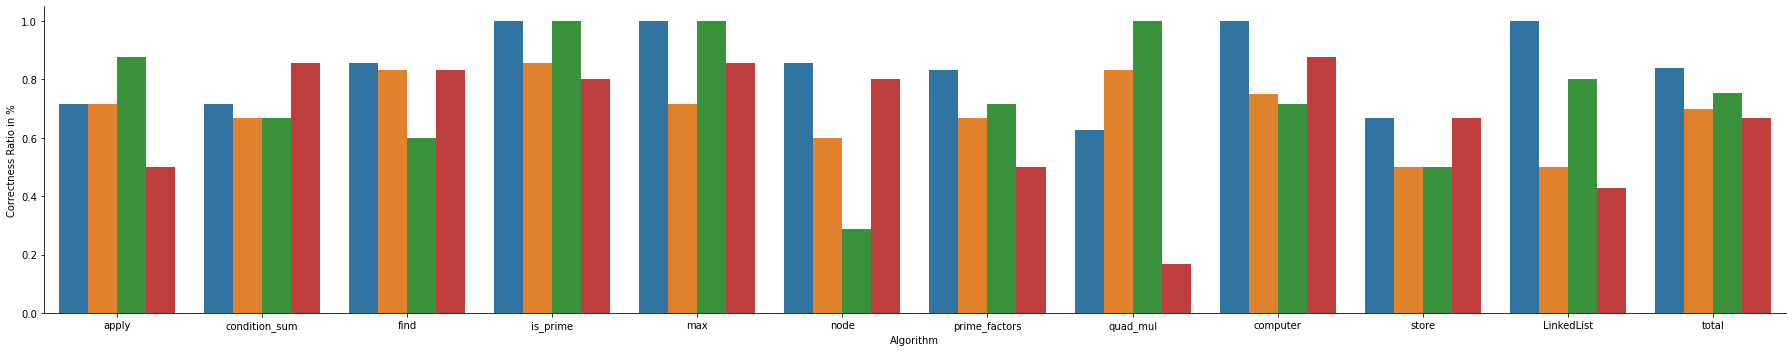

In [6]:
ax = sns.catplot(x="Algorithm", y="Ratio", hue="ProgrammingStyle", data=df_correctness_ratio, kind="bar",
                 height=5, aspect=5, legend=None)
ax.tight_layout()
ax.set(ylabel='Correctness Ratio in %')
plt.savefig("./results/RQ1/figures/RQ1_CorrectnessRatio_PerAlgorithm.png")
plt.show()
plt.close('all')

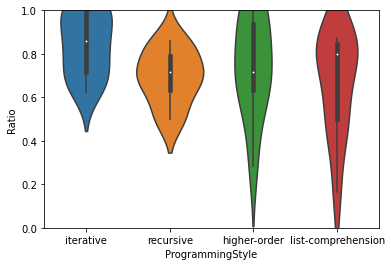

In [7]:
df_tmp = df_correctness_ratio[["ProgrammingStyle", "Algorithm", "Ratio"]]
df_tmp = df_tmp[df_tmp["Algorithm"] != "total"]
df_tmp["Ratio"] = df_tmp["Ratio"].astype(float)
ax = sns.violinplot(x="ProgrammingStyle", y="Ratio", data=df_tmp)
ax.set(ylim=(0.0, 1.0))
plt.savefig("./results/RQ1/figures/RQ1_CorrectnessRatio_PerStyle.png")
plt.show()
plt.close('all')

In [8]:
df_tmp = df_correctness_ratio[["ProgrammingStyle", "Algorithm", "Ratio"]].copy()
df_tmp["Ratio"] = df_tmp["Ratio"].astype(float)
result = df_tmp[["ProgrammingStyle", "Ratio"]].groupby("ProgrammingStyle").describe()
result.to_excel("./results/RQ1/data/RQ1_CorrectnessRatio_Describe.xlsx")
result

Ratio                                                    \
                   count      mean       std       min       25%       50%   
ProgrammingStyle                                                             
higher-order        12.0  0.742465  0.216378  0.285714  0.650000  0.733954   
iterative           12.0  0.842141  0.138452  0.625000  0.714286  0.847490   
list-comprehension  12.0  0.662599  0.221840  0.166667  0.500000  0.733333   
recursive           12.0  0.694390  0.118709  0.500000  0.650000  0.705628   

                                        
                         75%       max  
ProgrammingStyle                        
higher-order        0.906250  1.000000  
iterative           1.000000  1.000000  
list-comprehension  0.839286  0.875000  
recursive           0.770833  0.857143

### Response Time Data

In [9]:
df_response_time = df[["Algorithm","ProgrammingStyle", "ResponseTime"]].copy()
df_response_time["ResponseTime"] = df_response_time["ResponseTime"].astype(float).apply(lambda x : x/1000.)

In [10]:
df_response_time.to_excel('./results/RQ1/data/RQ1_ResponseTime.xlsx', index=False)
df_response_time

,Algorithm,ProgrammingStyle,ResponseTime
0,apply,iterative,66.794
1,apply,iterative,21.078
2,apply,iterative,81.561
3,apply,iterative,22.825
4,apply,iterative,20.310
...,...,...,...
297,LinkedList,list-comprehension,153.552
298,LinkedList,list-comprehension,47.933
300,LinkedList,list-comprehension,48.782
301,LinkedList,list-comprehension,55.439


In [11]:
df_tmp = df_response_time.copy()
df_tmp["Algorithm"] = "total"
df_response_time_total = df_response_time.append(df_tmp)

df_response_time_total = df_response_time_total.groupby(["ProgrammingStyle", "Algorithm"]).describe()
df_response_time_total.to_excel("./results/RQ1/data/RQ1_ResponseTime_Describe.xlsx")
df_response_time_total

ResponseTime                                  \
                                        count        mean         std     min   
ProgrammingStyle   Algorithm                                                    
higher-order       LinkedList             5.0   99.212200   64.048072  39.427   
                   apply                  8.0   12.051125   13.781719   4.797   
                   computer               7.0   94.314857   57.625112  36.792   
                   condition_sum          6.0   70.025667   79.949985  13.308   
                   find                   5.0   85.923600   49.524879  29.396   
                   is_prime               7.0   44.046429   29.146881  10.500   
                   max                    8.0   19.550500    9.316866   6.642   
                   node                   7.0   62.491000   41.027570  14.413   
                   prime_factors          7.0   92.200286   71.140110  28.030   
                   quad_mul               5.0   38.689200   43.672944  11.007   
                   store                  4.0   82.593500   17.162195  65.091   
                   total                 69.0   60.490348   54.079291   4.797   
iterative          LinkedList             6.0   62.200333   28.067373  31.585   
                   apply                  7.0   33.347857   28.656270   9.307   
                   computer               5.0   78.451400   44.854419  35.737   
                   condition_sum          7.0   37.864714   24.038318  14.922   
                   find                   7.0   18.890429    7.885119   7.266   
                   is_prime               9.0   39.973111   29.190073  12.344   
                   max                    6.0   31.476667   18.589396  13.618   
                   node                   7.0   70.347714   48.674644  25.672   
                   prime_factors          6.0   67.874667   62.469240  33.760   
                   quad_mul               8.0   40.629000   30.758335  16.065   
                   store                  6.0  110.478000   51.677056  61.393   
                   total                 74.0   51.788919   41.853885   7.266   
list-comprehension LinkedList             7.0   68.399571   38.787012  41.878   
                   apply                  6.0   49.784500   77.394027   4.491   
                   computer               8.0   66.471375   50.253177  25.349   
                   condition_sum          7.0   42.076714   31.042255  15.617   
                   find                   6.0   28.040333   23.724237   7.287   
                   is_prime               5.0    5.464600    2.380315   2.943   
                   max                    7.0   26.035857   20.455295   8.526   
                   node                   5.0  117.274600  134.208805  24.496   
                   prime_factors          6.0   95.462500  109.898831  14.014   
                   quad_mul               6.0   41.501667   17.731662  18.849   
                   store                  6.0  112.985833   68.735197  50.283   
                   total                 69.0   58.952188   66.527480   2.943   
recursive          LinkedList             6.0   63.851167   44.999959  15.750   
                   apply                  7.0   37.177286   24.026331  11.356   
                   computer               4.0   82.719750   48.663749  31.652   
                   condition_sum          6.0   31.716000   20.301535   9.720   
                   find                   6.0   51.573000   40.636461  14.406   
                   is_prime               7.0   38.932143   33.073185   9.019   
                   max                    7.0   48.316286   24.807067  17.183   
                   node                   5.0  105.518200   99.837839  43.857   
                   prime_factors          6.0  126.131833   89.458151  57.200   
                   quad_mul               6.0   18.845333   18.490714   7.893   
                   store                  6.0   88.166500   25.3

In [12]:
df_sub = df_response_time_total.reset_index()
df_sub["Algorithm"] = df_sub["Algorithm"].apply(lambda x: x.capitalize())
styles = ["iterative", "recursive", "higher-order", "list-comprehension"]
algos = sorted(df_sub["Algorithm"].unique())
result = ""
for algo in algos:
    result += f"{algo} & "
    df_algo = df_sub[df_sub["Algorithm"] == algo]
    for style in styles:
        df_style = df_algo[df_algo["ProgrammingStyle"] == style]
        mean = round(df_style[("ResponseTime", "mean")].values[0])
        std = round(df_style[("ResponseTime", "std")].values[0])
        result += f"{mean} & {std} & "
    result += "\n"
print(result)

Apply & 33 & 29 & 37 & 24 & 12 & 14 & 50 & 77 & 
Computer & 78 & 45 & 83 & 49 & 94 & 58 & 66 & 50 & 
Condition_sum & 38 & 24 & 32 & 20 & 70 & 80 & 42 & 31 & 
Find & 19 & 8 & 52 & 41 & 86 & 50 & 28 & 24 & 
Is_prime & 40 & 29 & 39 & 33 & 44 & 29 & 5 & 2 & 
Linkedlist & 62 & 28 & 64 & 45 & 99 & 64 & 68 & 39 & 
Max & 31 & 19 & 48 & 25 & 20 & 9 & 26 & 20 & 
Node & 70 & 49 & 106 & 100 & 62 & 41 & 117 & 134 & 
Prime_factors & 68 & 62 & 126 & 89 & 92 & 71 & 95 & 110 & 
Quad_mul & 41 & 31 & 19 & 18 & 39 & 44 & 42 & 18 & 
Store & 110 & 52 & 88 & 25 & 83 & 17 & 113 & 69 & 
Total & 52 & 42 & 61 & 54 & 60 & 54 & 59 & 67 & 



In [13]:
ylim = (0.0, 150.0)

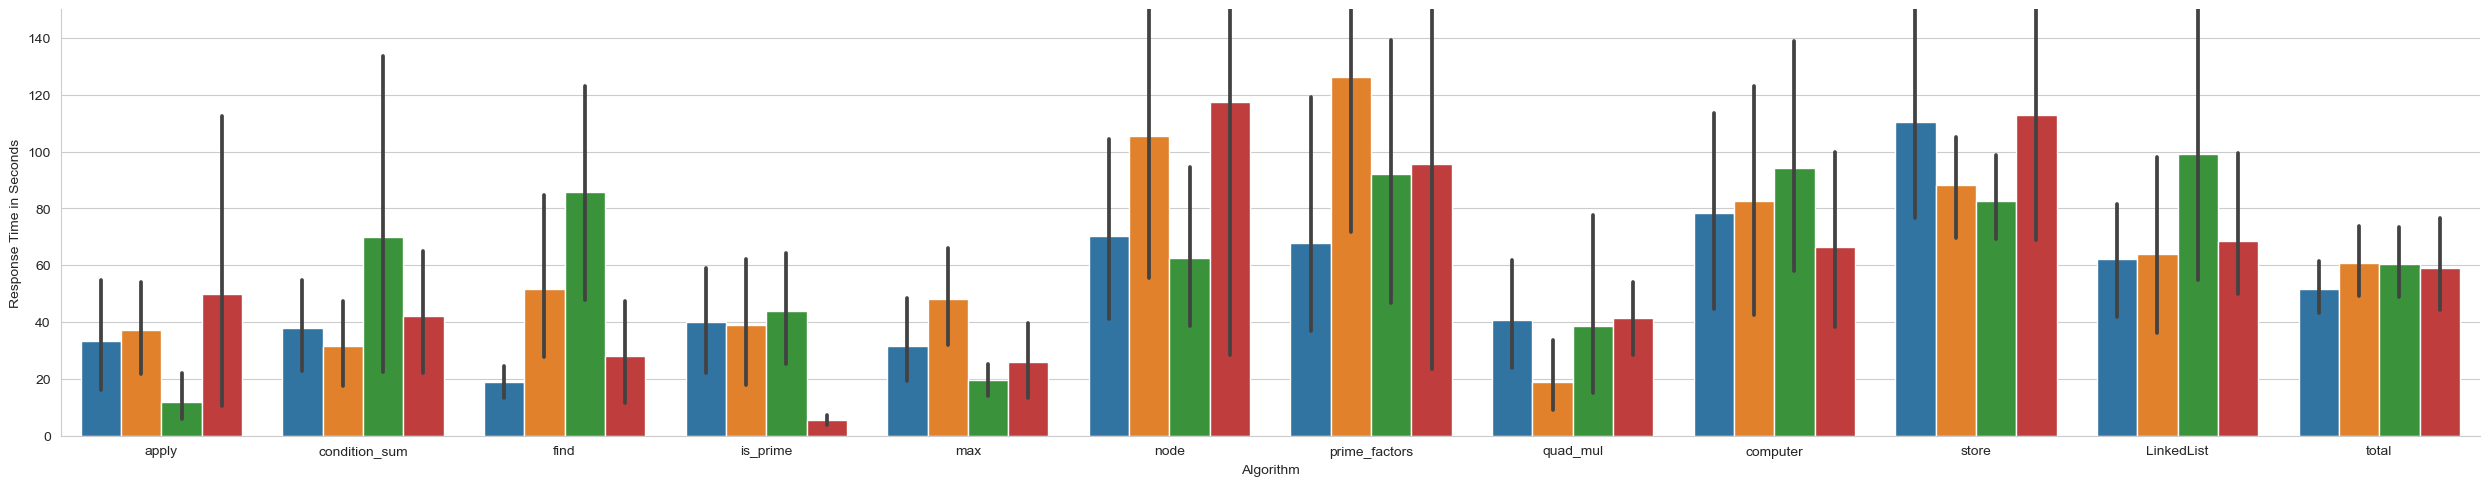

In [14]:
df_tmp = df_response_time.copy()
df_tmp["Algorithm"] = "total"
df_response_time_total = pd.concat([df_response_time, df_tmp])
ax = sns.catplot(x="Algorithm", y="ResponseTime", hue="ProgrammingStyle", data=df_response_time_total,
                 kind="bar", height=5, aspect=5, legend=False)
ax.tight_layout()
ax.set(ylim=ylim)
ax.set(ylabel='Response Time in Seconds')
plt.savefig("./results/RQ1/figures/RQ1_ResponseTime_PerAlgorithm.png")
plt.show()
plt.close('all')

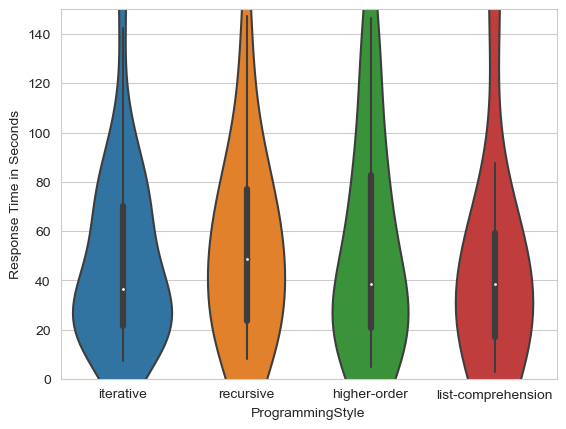

In [15]:
ax = sns.violinplot(x="ProgrammingStyle", y="ResponseTime", data=df_response_time)
ax.set(ylabel='Response Time in Seconds')
ax.set(ylim=ylim)
plt.savefig("./results/RQ1/figures/RQ1_ResponseTime_PerStyle.png")
plt.show()
plt.close('all')

## Inferential Statistics

In [13]:
df

,ID,ProgrammingStyle,Algorithm,ResponseTime,Correctness,ClickData,TimeData,Outlier
0,212,iterative,apply,66794,False,268-191 151-70 151-70 146-89 135-12 135-65 120...,10105 34435 35005 39192 47146 56587 61358 66794,False
1,245,iterative,apply,21078,True,156-17 174-195 129-44 131-62 141-93 141-114 14...,1123 3472 14145 14878 16035 19911 21078,False
2,272,iterative,apply,81561,True,188-192 104-34 132-69 149-89,16519 78023 79043 81561,False
3,296,iterative,apply,22825,False,160-195 122-115 148-9 138-34 140-60 132-94 153...,4194 11386 13568 14369 15567 17215 21808 22825,False
4,302,iterative,apply,20310,True,69-204 84-191 150-197 254-200 183-14 85-36 95-...,4193 5008 5850 6351 8856 10441 11790 13309 20310,False
...,...,...,...,...,...,...,...,...
297,213,list-comprehension,LinkedList,153552,False,42-22 65-45 51-123 81-143 111-161 100-143 50-1...,4155 9379 12561 13652 21857 23971 25078 25989 ...,False
298,252,list-comprehension,LinkedList,47933,True,110-12 118-37 101-117 126-142 134-170 137-190 ...,3853 4218 8660 9020 9434 9893 11026 11335 1200...,False
300,297,list-comprehension,LinkedList,48782,True,80-9 90-33 88-125 103-146 109-170 114-194 103-...,3545 4213 6711 7143 7700 8598 9962 10333 11843...,False
301,309,list-comprehension,LinkedList,55439,False,78-15 80-37 81-117 109-146 106-170 106-192 114...,3924 4856 5841 6974 7497 8040 10490 11359 1325...,False


### Correctness Ratio

In [17]:
df_tmp = df[["ProgrammingStyle", "Correctness"]].copy()
df_tmp["Correctness"] = df_tmp["Correctness"].apply(lambda x: 1.0 if x else 0.0)
df_result_p = util_stats.mannwhitneyu_for_df(df_tmp, "ProgrammingStyle", "Correctness")

df_tmp = df[["ProgrammingStyle", "Correctness"]].copy()
df_tmp["Correctness"] = df_tmp["Correctness"].apply(lambda x: 1.0 if x else 0.0)
df_result_e = util_stats.effectsize_for_df(df_tmp, "ProgrammingStyle", "Correctness")

df_result_correctness = df_result_p.merge(df_result_e, on=["Categorie_A", "Categorie_B"])
df_result_correctness = df_result_correctness.round(decimals=3)
df_result_correctness.to_excel("results/RQ1/data/RQ1_CorrectnessRatio_Stats.xlsx")
df_result_correctness

,Categorie_A,Categorie_B,p_value,Significant,Effect_Size,Effect_Size_Interpretation
0,iterative,recursive,0.049,False,0.141,negligible
1,iterative,higher-order,0.213,False,0.084,negligible
2,iterative,list-comprehension,0.018,False,0.171,small
3,recursive,higher-order,0.464,False,-0.057,negligible
4,recursive,list-comprehension,0.709,False,0.030,negligible
5,higher-order,list-comprehension,0.263,False,0.087,negligible


In [26]:
categories_a = df_result_correctness["Categorie_A"].unique()
categories_b = df_result_correctness["Categorie_B"].unique()
result = ""
for category in categories_a:
    result += f"{category} & "
    df_category = df_result_correctness[df_result_correctness["Categorie_A"] == category]
    for column in categories_b:
        df_sub = df_category[df_category["Categorie_B"] == column]
        if len(df_sub) == 0:
            result += "& & & & "
            continue
        p_value = df_sub["p_value"].values[0]
        significance = "*" if df_sub["Significant"].values[0] else ""
        effect_size = df_sub["Effect_Size"].values[0]
        effect_interpretation = df_sub["Effect_Size_Interpretation"].values[0]
        result += f"{p_value} & {significance} & {effect_size} & {effect_interpretation} & "
    result += "\n"
print(result)

iterative & 0.049 &  & 0.141 & negligible & 0.213 &  & 0.084 & negligible & 0.018 &  & 0.171 & small & 
recursive & & & & & 0.464 &  & -0.057 & negligible & 0.709 &  & 0.03 & negligible & 
higher-order & & & & & & & & & 0.263 &  & 0.087 & negligible & 



### Response Time Data

In [28]:
df_tmp = df_response_time[["ProgrammingStyle", "ResponseTime"]].copy()
df_result_p = util_stats.mannwhitneyu_for_df(df_tmp, "ProgrammingStyle", "ResponseTime")

df_tmp = df_response_time[["ProgrammingStyle", "ResponseTime"]].copy()
df_result_e = util_stats.effectsize_for_df(df_tmp, "ProgrammingStyle", "ResponseTime")

df_result_response_time = df_result_p.merge(df_result_e, on=["Categorie_A", "Categorie_B"])
df_result_response_time = df_result_response_time.round(decimals=3)
df_result_response_time.to_excel("results/RQ1/data/RQ1_ResponseTime_Stats.xlsx")
df_result_response_time

,Categorie_A,Categorie_B,p_value,Significant,Effect_Size,Effect_Size_Interpretation
0,iterative,recursive,0.380,False,-0.086,negligible
1,iterative,higher-order,0.706,False,-0.037,negligible
2,iterative,list-comprehension,0.533,False,0.061,negligible
3,recursive,higher-order,0.642,False,0.047,negligible
4,recursive,list-comprehension,0.145,False,0.146,negligible
5,higher-order,list-comprehension,0.509,False,0.065,negligible


In [30]:
categories_a = df_result_response_time["Categorie_A"].unique()
categories_b = df_result_response_time["Categorie_B"].unique()
result = ""
for category in categories_a:
    result += f"{category} & "
    df_category = df_result_response_time[df_result_response_time["Categorie_A"] == category]
    for column in categories_b:
        df_sub = df_category[df_category["Categorie_B"] == column]
        if len(df_sub) == 0:
            result += "& & & & "
            continue
        p_value = df_sub["p_value"].values[0]
        significance = "*" if df_sub["Significant"].values[0] else ""
        effect_size = df_sub["Effect_Size"].values[0]
        effect_interpretation = df_sub["Effect_Size_Interpretation"].values[0]
        result += f"{p_value} & {significance} & {effect_size} & {effect_interpretation} & "
    result += "\n"
print(result)

iterative & 0.38 &  & -0.086 & negligible & 0.706 &  & -0.037 & negligible & 0.533 &  & 0.061 & negligible & 
recursive & & & & & 0.642 &  & 0.047 & negligible & 0.145 &  & 0.146 & negligible & 
higher-order & & & & & & & & & 0.509 &  & 0.065 & negligible & 



# Correlation

In [31]:
variable_mapping = {
    "CASE" : "ID",
    "ST04_01" : "C++",
    "ST04_02" : "Java",
    "ST04_03" : "Haskell",
    "ST04_04" : "Python",
    "ST04_05" : "Prolog",
    "ST04_06" : "Rust",
    "ST04_07" : "Kotlin",
    "ST05_01" : "Logical",
    "ST05_02" : "Imperative",
    "ST05_03" : "Functional",
    "ST05_04" : "ObjectOriented",
    "ST12" : "Iteration",
    "ST13" : "Recursion",
    "ST14" : "HigherOrder",
    "ST15" : "ListComprehension",
}

df_demographics = pd.read_csv('./data/preprocessed_total_data.csv')
df_demographics = df_demographics[variable_mapping.keys()]
df_demographics.columns = variable_mapping.values()
df_language = df_demographics.melt(id_vars="ID", value_vars=["C++", "Java", "Haskell", "Python", "Prolog", "Rust", "Kotlin"], value_name="PreExperience", var_name="Language")
df_paradigm = df_demographics.melt(id_vars="ID", value_vars=["Logical", "Imperative", "Functional", "ObjectOriented"], value_name="PreExperience", var_name="Paradigm")
df_style = df_demographics.melt(id_vars="ID", value_vars=["Iteration", "Recursion", "HigherOrder", "ListComprehension"], value_name="PreExperience", var_name="Style")

In [34]:
df_response_time = df[["ID", "Algorithm","ProgrammingStyle", "ResponseTime"]].copy()
df_response_time["ResponseTime"] = df_response_time["ResponseTime"].astype(float).apply(lambda x : x/1000.)

df_tmp = df_response_time.copy()
df_tmp = df_tmp[["ID", "ProgrammingStyle", "ResponseTime"]]
df_tmp = df_tmp.merge(df_demographics, on="ID")
df_tmp = df_tmp[["ProgrammingStyle", "ResponseTime", "Iteration", "Recursion", "HigherOrder", "ListComprehension"]]
df_tmp = util_stats.correlations_for_df(df_tmp, "ProgrammingStyle", df_tmp.columns[2:],"ResponseTime")
df_tmp = df_tmp.round(3)
df_tmp.to_excel("results/RQ1/data/RQ1_ResponseTime_Correlations.xlsx", index=False)
df_corr_response_time = df_tmp.copy()
df_tmp

,ProgrammingStyle,PreExperience,Correlation
0,iterative,Iteration,-0.046
1,recursive,Iteration,0.041
2,higher-order,Iteration,-0.422
3,list-comprehension,Iteration,-0.070
4,iterative,Recursion,-0.121
5,recursive,Recursion,-0.103
6,higher-order,Recursion,-0.289
7,list-comprehension,Recursion,-0.130
8,iterative,HigherOrder,-0.092
9,recursive,HigherOrder,-0.063


In [35]:
df_correctness = df[["ID", "Algorithm","ProgrammingStyle", "Correctness"]].copy()
df_correctness["Correctness"] = df_correctness["Correctness"].astype(float)

df_tmp = df_correctness.copy()
df_tmp = df_tmp[["ID", "ProgrammingStyle", "Correctness"]]
df_tmp = df_tmp.merge(df_demographics, on="ID")
df_tmp = df_tmp[["ProgrammingStyle", "Correctness", "Iteration", "Recursion", "HigherOrder", "ListComprehension"]]
df_tmp = util_stats.correlations_for_df(df_tmp, "ProgrammingStyle", df_tmp.columns[2:],"Correctness")
df_tmp = df_tmp.round(3)
df_tmp.to_excel("results/RQ1/data/RQ1_Correctness_Correlations.xlsx", index=False)
df_corr_correctness = df_tmp.copy()
df_tmp

,ProgrammingStyle,PreExperience,Correlation
0,iterative,Iteration,0.205
1,recursive,Iteration,0.416
2,higher-order,Iteration,0.378
3,list-comprehension,Iteration,0.475
4,iterative,Recursion,0.178
5,recursive,Recursion,0.404
6,higher-order,Recursion,0.226
7,list-comprehension,Recursion,0.526
8,iterative,HigherOrder,0.101
9,recursive,HigherOrder,0.368


In [36]:
df_corr_response_time = df_corr_response_time.rename(columns={"Correlation": "ResponseTime Correlation"})
df_correctness_ratio = df_corr_correctness.rename(columns={"Correlation": "Correctness Correlation"})
df_merge = df_corr_response_time.merge(df_correctness_ratio, on=["ProgrammingStyle", "PreExperience"])
df_merge

,ProgrammingStyle,PreExperience,ResponseTime Correlation,Correctness Correlation
0,iterative,Iteration,-0.046,0.205
1,recursive,Iteration,0.041,0.416
2,higher-order,Iteration,-0.422,0.378
3,list-comprehension,Iteration,-0.070,0.475
4,iterative,Recursion,-0.121,0.178
5,recursive,Recursion,-0.103,0.404
6,higher-order,Recursion,-0.289,0.226
7,list-comprehension,Recursion,-0.130,0.526
8,iterative,HigherOrder,-0.092,0.101
9,recursive,HigherOrder,-0.063,0.368


In [39]:
tasks = df_merge["ProgrammingStyle"].unique()
experience = df_merge["PreExperience"].unique()
result = ""
for task in tasks:
    result += f"{task} & "
    for exp in experience:
        df_sub = df_merge[(df_merge["ProgrammingStyle"] == task) & (df_merge["PreExperience"] == exp)]
        if len(df_sub) == 0:
            result += "& & & & "
            continue
        response_corr = df_sub["ResponseTime Correlation"].values[0]
        correctness_corr = df_sub["Correctness Correlation"].values[0]
        result += f"{correctness_corr} & {response_corr} & "
    result += "\n"

print(result)

iterative & 0.205 & -0.046 & 0.178 & -0.121 & 0.101 & -0.092 & -0.031 & -0.13 & 
recursive & 0.416 & 0.041 & 0.404 & -0.103 & 0.368 & -0.063 & 0.253 & -0.129 & 
higher-order & 0.378 & -0.422 & 0.226 & -0.289 & 0.344 & -0.17 & 0.165 & -0.19 & 
list-comprehension & 0.475 & -0.07 & 0.526 & -0.13 & 0.4 & -0.077 & 0.32 & 0.002 & 

